In [29]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
%matplotlib inline

In [40]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,GridSearchCV

In [31]:
df=pd.read_csv('../datasets/loan.csv')

In [32]:
df

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved
...,...,...,...,...,...,...,...,...
56,39,Male,Architect,Master's,Married,100000,770,Approved
57,25,Female,Receptionist,High School,Single,32000,570,Denied
58,43,Male,Banker,Bachelor's,Married,95000,760,Approved
59,30,Female,Writer,Master's,Single,55000,650,Approved


In [33]:
X=df.drop(columns=['loan_status','occupation'])
Y=df['loan_status']

In [34]:
numerical_data=X.select_dtypes(['number']).columns
categorical_data=X.select_dtypes(['object']).columns

In [35]:
preprocess=ColumnTransformer(transformers=[('encode',OneHotEncoder(),categorical_data),('scale',StandardScaler(),numerical_data)])

In [36]:
pipe=Pipeline([('preprocess',preprocess),('model',LogisticRegression())])

In [37]:
xtr,xte,ytr,yte=train_test_split(X,Y,test_size=0.2,random_state=42)

In [38]:
pipe.fit(xtr,ytr)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('encode', OneHotEncoder(),
                                                  Index(['gender', 'education_level', 'marital_status'], dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['age', 'income', 'credit_score'], dtype='object'))])),
                ('model', LogisticRegression())])

In [39]:
yp=pipe.predict(xte)

In [41]:
accuracy_score(yte,yp)

1.0

In [43]:
print(classification_report(yp,yte))

              precision    recall  f1-score   support

    Approved       1.00      1.00      1.00         9
      Denied       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [44]:
print(confusion_matrix(yp,yte))

[[9 0]
 [0 4]]


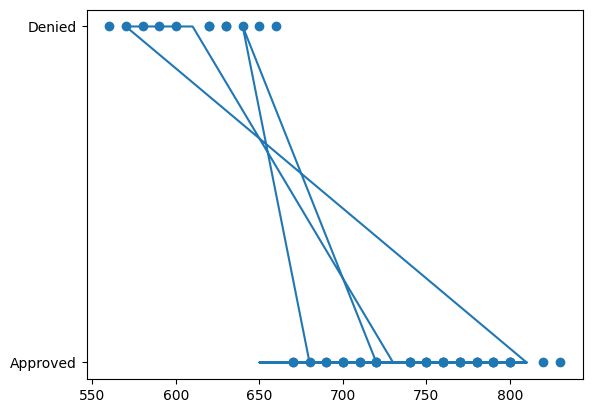

In [55]:
plt.scatter(xtr.iloc[:,5],ytr)
plt.plot(xte.iloc[:,5],yp)

In [64]:
xtest=df[30:]

In [65]:
xtest

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
30,27,Male,Photographer,Associate's,Single,40000,600,Denied
31,54,Female,Editor,Master's,Married,85000,760,Approved
32,32,Male,Programmer,Bachelor's,Married,95000,780,Approved
33,47,Female,Dentist,Doctoral,Married,140000,810,Approved
34,29,Male,Musician,Bachelor's,Single,30000,570,Denied
35,52,Female,Psychologist,Doctoral,Married,110000,800,Approved
36,35,Male,Engineer,Master's,Married,100000,770,Approved
37,26,Female,Server,High School,Single,28000,560,Denied
38,40,Male,Software,Bachelor's,Married,85000,740,Approved
39,33,Female,Stylist,Associate's,Single,42000,620,Denied


In [72]:
xtest=xtest.sort_values(by='loan_status', ascending=False)

In [76]:
xtest

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
30,27,Male,Photographer,Associate's,Single,40000,600,Denied
51,29,Female,Designer,Bachelor's,Single,48000,640,Denied
43,28,Female,Nurse,Associate's,Single,50000,660,Denied
54,32,Male,Salesman,High School,Single,45000,630,Denied
39,33,Female,Stylist,Associate's,Single,42000,620,Denied
49,27,Female,Artist,Bachelor's,Single,35000,600,Denied
57,25,Female,Receptionist,High School,Single,32000,570,Denied
34,29,Male,Musician,Bachelor's,Single,30000,570,Denied
37,26,Female,Server,High School,Single,28000,560,Denied
38,40,Male,Software,Bachelor's,Married,85000,740,Approved


In [73]:
Y_test=xtest['loan_status']

In [74]:
X_test=xtest.drop(columns='loan_status')

In [75]:
X_test

,age,gender,occupation,education_level,marital_status,income,credit_score
30,27,Male,Photographer,Associate's,Single,40000,600
51,29,Female,Designer,Bachelor's,Single,48000,640
43,28,Female,Nurse,Associate's,Single,50000,660
54,32,Male,Salesman,High School,Single,45000,630
39,33,Female,Stylist,Associate's,Single,42000,620
49,27,Female,Artist,Bachelor's,Single,35000,600
57,25,Female,Receptionist,High School,Single,32000,570
34,29,Male,Musician,Bachelor's,Single,30000,570
37,26,Female,Server,High School,Single,28000,560
38,40,Male,Software,Bachelor's,Married,85000,740


In [77]:
Yp_test=pipe.predict(X_test)

Text(0.5, 1.0, 'LogisticRegression graph')

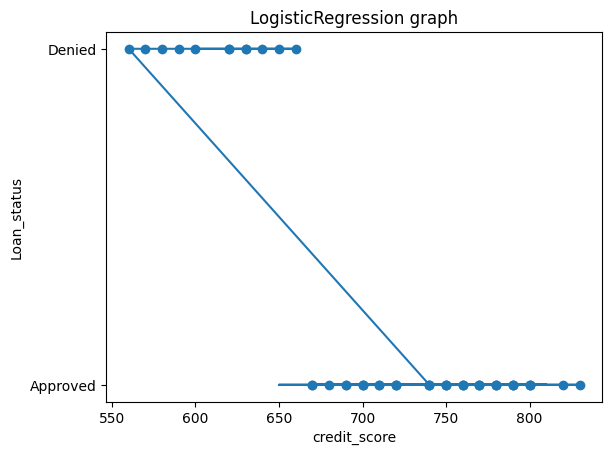

In [92]:
plt.scatter(xtr.iloc[:,-1],ytr)
plt.plot(X_test.iloc[:,-1],Yp_test)
plt.xlabel('credit_score')
plt.ylabel('Loan_status')
plt.title('LogisticRegression graph')

In [85]:
accuracy_score(Yp_test,Y_test)

1.0

Text(0.5, 1.0, 'confusion_matrix')

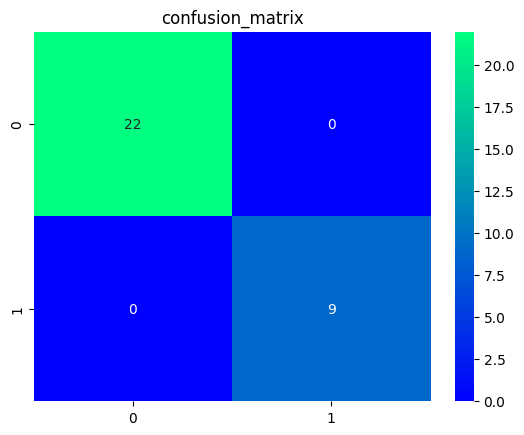

In [90]:
sns.heatmap(confusion_matrix(Yp_test,Y_test),annot=True,cmap='winter')
plt.title('confusion_matrix')